# YOLOX Weapon Detection Training & Validation Script

### Library Imports

In [2]:
from autogluon.multimodal import MultiModalPredictor
from autogluon.multimodal.presets import get_automm_presets
from autogluon.multimodal.utils import ObjectDetectionVisualizer
import os
import time
import json
import yaml
import uuid
import torch
import datetime

e:\Programs\miniforge3\envs\ag_stable\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Set PyTorch Precision

In [2]:
torch.set_float32_matmul_precision('medium')

### Medium Quality Preset Info

In [3]:
hyperparameters, hyperparameter_tune_kwargs = get_automm_presets(problem_type="object_detection", presets="medium_quality")
print(f"hyperparameters: {yaml.dump(hyperparameters, allow_unicode=True, default_flow_style=False)}")
print(f"hyperparameter_tune_kwargs: {json.dumps(hyperparameter_tune_kwargs, sort_keys=True, indent=4)}")

hyperparameters: env.auto_select_gpus: true
env.eval_batch_size_ratio: 1
env.num_gpus: -1
env.num_workers: 2
env.per_gpu_batch_size: 2
env.precision: 32
env.strategy: ddp
model.mmdet_image.checkpoint_name: yolox_l
model.names:
- mmdet_image
optimization.check_val_every_n_epoch: 3
optimization.learning_rate: 5.0e-05
optimization.lr_choice: two_stages
optimization.lr_decay: 0.9
optimization.lr_mult: 100
optimization.max_epochs: 50
optimization.patience: 3
optimization.top_k: 1
optimization.top_k_average_method: best
optimization.val_check_interval: 1.0
optimization.warmup_steps: 0.0

hyperparameter_tune_kwargs: {}


### Set Preset & Save Directory 

In [4]:
presets = "medium_quality"
model_path = f"./tmp/{datetime.datetime.now().timestamp()}-weapon_detection_yolox"

### Set Training and Testing Annotation Path

In [5]:
train_path = ".\\remapped-train-80-val-20_coco\\train\Annotations\\trainval.coco.json"
test_path = ".\\remapped-train-80-val-20_coco\\test\Annotations\\test.coco.json"

In [6]:
print(train_path)

.\remapped-train-80-val-20_coco\train\Annotations\trainval.coco.json


### Initiate Model

In [7]:
predictor = MultiModalPredictor(
    problem_type="object_detection",
    sample_data_path=train_path,
    presets=presets,
    path=model_path
)

### Start Training

In [8]:
predictor.fit(train_path,
              hyperparameters={
                  "optimization.max_epochs": 1,
              })

=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          32
Pytorch Version:    2.0.1+cu118
CUDA Version:       11.8
Memory Avail:       50.62 GB / 63.91 GB (79.2%)
Disk Space Avail:   WARNING, an exception (FileNotFoundError) occurred while attempting to get available disk space. Consider opening a GitHub Issue.


Using default root folder: .\remapped-train-80-val-20_coco\train\Annotations\... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!



AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir e:\Current_Workdir\Portfolios\Weapon-Object-Detection\tmp\1712929909.516784-weapon_detection_yolox
    ```

Global seed set to 0


Loads checkpoint by local backend from path: yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth


GPU Count: 1
GPU Count to be Used: 1
GPU 0 Name: NVIDIA GeForce RTX 3060
GPU 0 Memory: 1.78GB/12.0GB (Used/Total)



The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([4, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for bbox_head.multi_level_conv_cls.1.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([4, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.1.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for bbox_head.multi_level_conv_cls.2.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([4, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                             | Params
-----------------------------------------------------------------------
0 | model             | MMDetAutoModelForObjectDetection | 54.2 M
1 | validation_metric | MeanAveragePrecision             | 0     
-----------------------------------------------------------------------
54.2 M    Trainable params
0         Non-trainable params
54.2 M    Total params
216.601   Total estimated model params size (MB)


e:\Programs\miniforge3\envs\ag_stable\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch 0:   6%|▌         | 298/4902 [01:16<19:39,  3.90it/s] 

e:\Programs\miniforge3\envs\ag_stable\lib\site-packages\lightning\pytorch\trainer\call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


KeyError: 'val_map'

### Inference

In [3]:
predictor = MultiModalPredictor.load(".\\tmp\\1712903603.213322-weapon_detection_yolox")

Load pretrained checkpoint: e:\Current_Workdir\Portfolios\Weapon-Object-Detection\experiments3\tmp\1712903603.213322-weapon_detection_yolox\model.ckpt


In [19]:
predictor.fit_summary(verbosity=3, show_plot=True)

{'val_map': None, 'training_time': None}

In [30]:
predictor.dump_model()

'e:\\Current_Workdir\\Portfolios\\Weapon-Object-Detection\\tmp\\1712903603.213322-weapon_detection_yolox'

: 

### Evaluating on Testing Data

In [21]:
predictor.evaluate(test_path)

Using default root folder: .\remapped-train-80-val-20_coco\test\Annotations\... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Predicting DataLoader 0: 100%|██████████| 659/659 [00:42<00:00, 15.64it/s]


A new predictor save path is created. This is to prevent you to overwrite previous predictor saved here. You could check current save path at predictor._save_path. If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels\ag-20240412_101945"


saving file at e:\Current_Workdir\Portfolios\Weapon-Object-Detection\AutogluonModels\ag-20240412_101945\object_detection_result_cache.json
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
Epoch 0:   1%|          | 7/613 [3:37:58<314:30:43, 1868.39s/it]
DONE (t=20.87s).
Accumulating evaluation results...
DONE (t=0.16s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.532
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.405
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.248
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.353
 Average Recall     

{'map': 0.368651498931753,
 'mean_average_precision': 0.368651498931753,
 'map_50': 0.5322047084615464,
 'map_75': 0.40489196743004846,
 'map_small': 0.04416548797736915,
 'map_medium': 0.24819085114457512,
 'map_large': 0.35291967798040086,
 'mar_1': 0.3725378657172136,
 'mar_10': 0.43781051979421554,
 'mar_100': 0.4415987645607211,
 'mar_small': 0.07777777777777778,
 'mar_medium': 0.31048041389504805,
 'mar_large': 0.455563889457637}

In [22]:
pred = predictor.predict()
print(pred)

Using default root folder: .\remapped-train-80-val-20_coco\test\Annotations\... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Predicting DataLoader 0: 100%|██████████| 659/659 [00:41<00:00, 15.76it/s]
                                                  image  \
0     .\remapped-train-80-val-20_coco\test\Annotatio...   
1     .\remapped-train-80-val-20_coco\test\Annotatio...   
2     .\remapped-train-80-val-20_coco\test\Annotatio...   
3     .\remapped-train-80-val-20_coco\test\Annotatio...   
4     .\remapped-train-80-val-20_coco\test\Annotatio...   
...                                                 ...   
1312  .\remapped-train-80-val-20_coco\test\Annotatio...   
1313  .\remapped-train-80-val-20_coco\test\Annotatio...   
1314  .\remapped-train-80-val-20_coco\test\Annotatio...   
1315  .\remapped-train-80-val-20_coco\test\Annotatio...   
1316  .\remapped-train-80-val-20_coco\test\Annotatio...   

                                                 bboxes  
0     [{'class': 'gun', 'class_id': 1, 'bbox': [404....  
1     [{'class': 

In [23]:
pred.iloc[2].bboxes

[{'class': 'gun',
  'class_id': 1,
  'bbox': [219.70285034179688,
   396.3799133300781,
   271.87054443359375,
   476.5343933105469],
  'score': 0.7297757267951965},
 {'class': 'gun',
  'class_id': 1,
  'bbox': [599.7958374023438,
   198.7767333984375,
   639.2627563476562,
   233.52081298828125],
  'score': 0.35211336612701416},
 {'class': 'gun',
  'class_id': 1,
  'bbox': [318.03515625,
   367.8453369140625,
   393.9805908203125,
   436.88580322265625],
  'score': 0.15330301225185394},
 {'class': 'heavy-weapon',
  'class_id': 2,
  'bbox': [0.020660400390625,
   -1.371185302734375,
   635.7327880859375,
   635.8131103515625],
  'score': 0.08981583267450333},
 {'class': 'heavy-weapon',
  'class_id': 2,
  'bbox': [206.4649658203125,
   97.58682250976562,
   370.7835693359375,
   536.4896240234375],
  'score': 0.031247641891241074},
 {'class': 'gun',
  'class_id': 1,
  'bbox': [584.4884643554688,
   193.36468505859375,
   640.7428588867188,
   234.1649169921875],
  'score': 0.02723265066

In [25]:
conf_threshold = 0.5
image_result = pred.iloc[2]
img_path = image_result.image
visualizer = ObjectDetectionVisualizer(img_path)  # Initialize the Visualizer
out = visualizer.draw_instance_predictions(image_result, conf_threshold=conf_threshold)  # Draw detections
visualized = out.get_image()  # Get the visualized image

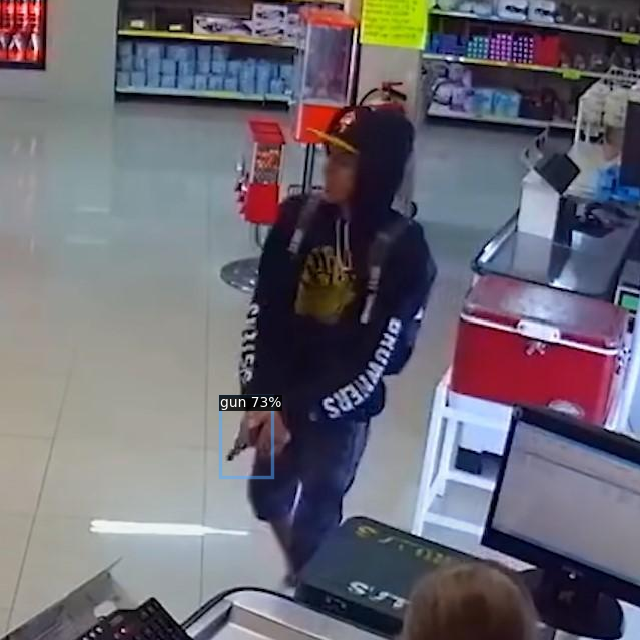

In [26]:
from PIL import Image
from IPython.display import display
img = Image.fromarray(visualized, 'RGB')
display(img)

In [27]:
# Initialize count variable
count_gun = 0

# Iterate through each dictionary in the list
for item in pred.iloc[2].bboxes:
    # Check if class is 'motorbike' and score is higher than 0.5
    if item['class'] == 'gun' and item['score'] > 0.5:
        # Increment count
        count_gun += 1
        # Print bbox
        print("Bounding Box:", item['bbox'])

# Print the count
print("Number of shotgun with score higher than 0.5:", count_gun)

Bounding Box: [219.70285034179688, 396.3799133300781, 271.87054443359375, 476.5343933105469]
Number of shotgun with score higher than 0.5: 1


## Video Inference

### convert checkpoint to .pth

In [48]:
checkpoint = torch.load("tmp\\1712574514.638211-weapon_detection_yolox\\model.ckpt")
model_state_dict = checkpoint['state_dict']
torch.save(model_state_dict, 'yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23_fine_tuned.pth')

## Export ONNX

In [9]:
predictor.export_onnx("/onnx")

NotImplementedError: export_onnx doesn't support model type <class 'autogluon.multimodal.models.mmdet_image.MMDetAutoModelForObjectDetection'>